In [80]:
#Train on more data 

#Two class approach  : Take only values with sliding windows = 1 and =2

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.losses import CategoricalCrossentropy
#import keras

In [82]:
data1=pd.read_csv(r"/home/divit/project/OCDetect_03_recording_06_c076109d-651c-46c4-a745-5df8b383bec3.csv")

In [83]:
data=data1

In [84]:
len(data1)

2661186

In [85]:
len(data1[data1["relabeled"]==0])

2626968

In [86]:
len(data1[data1["relabeled"]==1])

22812

In [87]:
len(data1[data1["relabeled"]==2])

11406

In [88]:
data["relabeled"].unique()

array([0, 1, 2])

In [89]:
np.unique(data1["relabeled"])

array([0, 1, 2])

In [90]:
data_a=data[data["relabeled"]==0][:70000]
data_b=data[data["relabeled"]==1][:11000]
data_c=data[data["relabeled"]==2][:11000]
data=pd.concat([data_a,data_b,data_c],axis=0)

In [91]:
#data_a["relabeled"].value_counts()

In [92]:
#data_b["relabeled"].value_counts()

In [93]:
#data_c["relabeled"].value_counts()

In [94]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
data[["acc x","acc y","acc z","gyro x","gyro y","gyro z"]]=scaler.fit_transform(data[["acc x","acc y","acc z","gyro x","gyro y","gyro z"]])


In [95]:
data[["acc x","acc y","acc z","gyro x","gyro y","gyro z"]]

,acc x,acc y,acc z,gyro x,gyro y,gyro z
0,0.486068,0.550971,0.733757,0.435644,0.488997,0.348265
1,0.492940,0.549565,0.734011,0.433246,0.492422,0.353128
2,0.490524,0.548093,0.730652,0.435768,0.493320,0.361523
3,0.483610,0.548523,0.724279,0.437669,0.472101,0.377649
4,0.473198,0.550690,0.731509,0.435981,0.439430,0.386301
...,...,...,...,...,...,...
2421971,0.526136,0.487762,0.646075,0.423209,0.522174,0.301270
2421972,0.521138,0.496213,0.641417,0.415056,0.523072,0.296662
2421973,0.521429,0.490276,0.627143,0.407276,0.524363,0.295434
2421974,0.522971,0.473605,0.631013,0.397524,0.524644,0.293642


In [96]:
data["relabeled"]

0          0
1          0
2          0
3          0
4          0
          ..
2421971    2
2421972    2
2421973    2
2421974    2
2421975    2
Name: relabeled, Length: 72000, dtype: int64

In [97]:
data

,timestamp,datetime,acc x,acc y,acc z,gyro x,gyro y,gyro z,user yes/no,compulsive,urge,tense,ignore,relabeled
0,0.000000e+00,2022-04-06 07:39:30.000,0.486068,0.550971,0.733757,0.435644,0.488997,0.348265,-1.0,0.0,0.0,0.0,0,0
1,2.000000e+07,2022-04-06 07:39:30.020,0.492940,0.549565,0.734011,0.433246,0.492422,0.353128,NaN,NaN,NaN,NaN,0,0
2,4.000000e+07,2022-04-06 07:39:30.040,0.490524,0.548093,0.730652,0.435768,0.493320,0.361523,NaN,NaN,NaN,NaN,0,0
3,6.000000e+07,2022-04-06 07:39:30.060,0.483610,0.548523,0.724279,0.437669,0.472101,0.377649,NaN,NaN,NaN,NaN,0,0
4,8.000000e+07,2022-04-06 07:39:30.080,0.473198,0.550690,0.731509,0.435981,0.439430,0.386301,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2421971,4.843942e+13,2022-04-06 21:06:49.420,0.526136,0.487762,0.646075,0.423209,0.522174,0.301270,NaN,NaN,NaN,NaN,0,2
2421972,4.843944e+13,2022-04-06 21:06:49.440,0.521138,0.496213,0.641417,0.415056,0.523072,0.296662,NaN,NaN,NaN,NaN,0,2
2421973,4.843946e+13,2022-04-06 21:06:49.460,0.521429,0.490276,0.627143,0.407276,0.524363,0.295434,NaN,NaN,NaN,NaN,0,2
2421974,4.843948e+13,2022-04-06 21:06:49.480,0.522971,0.473605,0.631013,0.397524,0.524644,0.293642,NaN,NaN,NaN,NaN,0,2


In [98]:
data['relabeled'].unique()

array([0, 1, 2])

In [99]:
data['relabeled'].value_counts()

relabeled
0    50000
1    11000
2    11000
Name: count, dtype: int64

In [100]:
data.count()

timestamp      72000
datetime       72000
acc x          72000
acc y          72000
acc z          72000
gyro x         72000
gyro y         72000
gyro z         72000
user yes/no        3
compulsive         3
urge               3
tense              3
ignore         72000
relabeled      72000
dtype: int64

In [101]:
#new_data=data[data['compulsive'].notnull()]

In [102]:
new_data=data

In [103]:
new_data.columns

Index(['timestamp', 'datetime', 'acc x', 'acc y', 'acc z', 'gyro x', 'gyro y',
       'gyro z', 'user yes/no', 'compulsive', 'urge', 'tense', 'ignore',
       'relabeled'],
      dtype='object')

In [104]:
new_data=new_data.drop(['timestamp','datetime','user yes/no','compulsive', 'urge', 'tense', 'ignore'],axis=1)

In [105]:
new_data.columns

Index(['acc x', 'acc y', 'acc z', 'gyro x', 'gyro y', 'gyro z', 'relabeled'], dtype='object')

In [106]:
new_data.count()

acc x        72000
acc y        72000
acc z        72000
gyro x       72000
gyro y       72000
gyro z       72000
relabeled    72000
dtype: int64

In [107]:
new_data

,acc x,acc y,acc z,gyro x,gyro y,gyro z,relabeled
0,0.486068,0.550971,0.733757,0.435644,0.488997,0.348265,0
1,0.492940,0.549565,0.734011,0.433246,0.492422,0.353128,0
2,0.490524,0.548093,0.730652,0.435768,0.493320,0.361523,0
3,0.483610,0.548523,0.724279,0.437669,0.472101,0.377649,0
4,0.473198,0.550690,0.731509,0.435981,0.439430,0.386301,0
...,...,...,...,...,...,...,...
2421971,0.526136,0.487762,0.646075,0.423209,0.522174,0.301270,2
2421972,0.521138,0.496213,0.641417,0.415056,0.523072,0.296662,2
2421973,0.521429,0.490276,0.627143,0.407276,0.524363,0.295434,2
2421974,0.522971,0.473605,0.631013,0.397524,0.524644,0.293642,2


In [108]:
#labels=new_data['relabeled'].values
#print(labels)
#print(len(labels))

In [109]:
#features=new_data[['acc x', 'acc y', 'acc z', 'gyro x', 'gyro y', 'gyro z']].values
#print(features)

#print(len(features))

In [110]:
#import sklearn
#from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler()

In [111]:
#s_features=scaler.fit_transform(features)

In [112]:
#type(features)

In [113]:


from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(new_data,test_size=0.2)

In [114]:
len(train_data)

57600

In [115]:
#type(labels)

In [116]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense,Conv1D,Flatten,BatchNormalization,MaxPooling1D
from tensorflow.keras.utils import to_categorical



In [117]:
#x_trai=x_train.reshape()

In [118]:
#y_train.shape

In [119]:
# Define window size
window_size = 150
step_size = 50
# Initialize lists to store windowed data and labels
train_windows = []
train_labels = []
test_windows = []
test_labels = []
i=0



for i in range(0,len(train_data)-window_size+1,window_size):
    
    window = train_data.iloc[i:i+window_size, :-1]  # Select only sensor axes columns
    train_windows.append(window)
    label_window = train_data.iloc[i:i+window_size, -1]  # Select the label column for majority voting
    majority_label = np.bincount(label_window).argmax()  # Majority voting
    train_labels.append(majority_label)
    
for i in range(0,len(test_data)-window_size+1,window_size):
    
    window = test_data.iloc[i:i+window_size, :-1]  # Select only sensor axes columns
    test_windows.append(window)
    label_window = test_data.iloc[i:i+window_size, -1]  # Select the label column for majority voting
    majority_label = np.bincount(label_window).argmax()  # Majority voting
    test_labels.append(majority_label)



In [120]:
#np.unique(train_data.iloc[i:i+window_size, -1])

In [121]:
train_windows=np.array(train_windows)
train_labels=np.array(train_labels)

In [122]:
test_windows=np.array(test_windows)
test_labels=np.array(test_labels)

In [123]:
len(train_windows)==len(train_labels)
print(len(train_windows))

384


In [124]:
len(np.unique(train_labels))

1

In [125]:
len(np.unique(train_windows))

43947

In [126]:
train_windows.shape

(384, 150, 6)

In [127]:
#train_windows = train_windows.reshape(train_windows.shape[0], -1)

In [128]:
train_windows.shape

(384, 150, 6)

In [129]:
train_labels.shape

(384,)

In [130]:
#train_windows=train_windows.reshape(990,180,1)
#train_labels=train_labels.reshape(990,1)

In [131]:
train_windows.shape

(384, 150, 6)

In [132]:
train_labels.shape

(384,)

In [133]:
train_labels[100]

0

In [134]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels, 3)
train_labels.shape

(384, 3)

In [135]:
test_labels = to_categorical(test_labels, 3)
test_labels.shape

(96, 3)

In [136]:
model=Sequential()


model.add(Conv1D(512,1,input_shape=(150,6),activation="relu"))

#model.add(MaxPooling1D(2))
model.add(Conv1D(256,1))

#model.add(MaxPooling1D(2))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add((Flatten()))

model.add(Dense(1024, activation="relu"))
model.add(Dense(512,activation="relu"))

model.add(Dense(3, activation="softmax"))



In [137]:
class_labels = np.unique(data1["relabeled"])
class_weights = compute_class_weight('balanced', classes=class_labels, y=data1["relabeled"])
class_weights_dict = {class_label: weight for class_label, weight in zip(class_labels, class_weights)}
loss = CategoricalCrossentropy()
model.compile(optimizer='adam', loss=loss,metrics=['accuracy'])

model.fit(train_windows,train_labels, epochs=10, class_weight=class_weights_dict,validation_data=(test_windows,test_labels))

Epoch 1/10
12/12 [==============================] - 9s 620ms/step - loss: 0.0326 - accuracy: 0.9401 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
12/12 [==============================] - 7s 607ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
12/12 [==============================] - 7s 610ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
12/12 [==============================] - 7s 594ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
12/12 [==============================] - 7s 606ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
12/12 [==============================] - 7s 620ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
12/12 [==============================] - 8s 645ms/step - loss: 0.0000e+00 - accuracy: 1.0000 

In [138]:
#np.unique(labels)

In [139]:
#X_windows.shape

In [140]:
#y_train.shape

In [141]:
#train_windows[0]

In [142]:
#train_windows[100]


In [143]:
train_windows[100]

array([[0.46415927, 0.50988984, 0.64577348, 0.41336861, 0.54339283,
        0.30505784],
       [0.61631055, 0.47577149, 0.63200946, 0.42800553, 0.52958347,
        0.32225861],
       [0.58440585, 0.47798761, 0.62605432, 0.42846738, 0.52425058,
        0.31570594],
       [0.54816944, 0.50735949, 0.58084623, 0.49207758, 0.50179633,
        0.36408312],
       [0.56770378, 0.50416761, 0.62535917, 0.43830822, 0.50449084,
        0.31821438],
       [0.62639011, 0.44188468, 0.6288581 , 0.43342332, 0.54221398,
        0.3173441 ],
       [0.59090341, 0.47532496, 0.63441932, 0.4288404 , 0.52447513,
        0.31626906],
       [0.4950227 , 0.48096449, 0.65958384, 0.43983586, 0.5245874 ,
        0.30853894],
       [0.59311092, 0.45490025, 0.63627306, 0.41907062, 0.50359267,
        0.31765126],
       [0.60718897, 0.48043527, 0.62494207, 0.42781014, 0.53379364,
        0.31022831],
       [0.54183848, 0.50640027, 0.6577301 , 0.43800624, 0.52890984,
        0.4147128 ],
       [0.57720022, 0

In [144]:
model.metrics

In [145]:
model.history.history

{'loss': [0.03257523104548454, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'accuracy': [0.9401041865348816, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'val_loss': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'val_accuracy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}

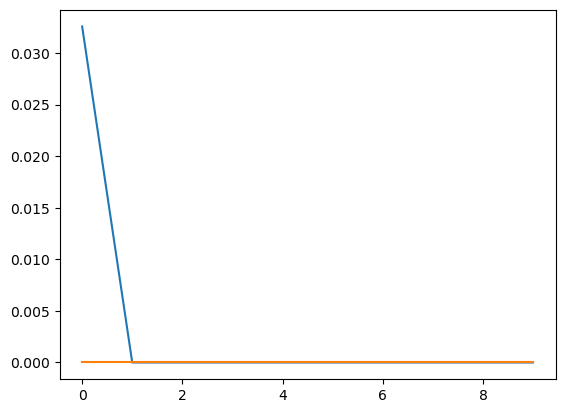

In [146]:
loss_graph=pd.DataFrame(model.history.history['loss'])
vloss_graph=pd.DataFrame(model.history.history['val_loss'])
plt.plot(loss_graph)
plt.plot(vloss_graph)


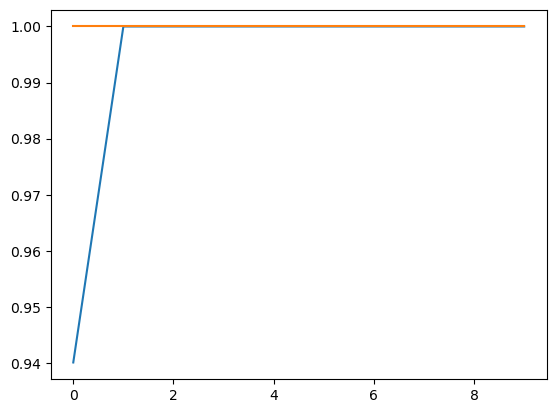

In [147]:
acc_graph=pd.DataFrame(model.history.history['accuracy'])
vacc_graph=pd.DataFrame(model.history.history['val_accuracy'])
plt.plot(acc_graph)
plt.plot(vacc_graph)


In [148]:
pred=model.predict(test_windows)

3/3 [==============================] - 0s 70ms/step


In [149]:
pred

array([[1.00000000e+00, 3.46253115e-09, 2.55012567e-10],
       [1.00000000e+00, 1.86537830e-09, 1.31882560e-10],
       [1.00000000e+00, 2.25102847e-09, 1.51236135e-10],
       [1.00000000e+00, 4.57735450e-09, 3.24317406e-10],
       [1.00000000e+00, 1.27643529e-09, 9.06426878e-11],
       [1.00000000e+00, 7.37352224e-09, 5.81163340e-10],
       [1.00000000e+00, 1.29485567e-09, 8.44739417e-11],
       [1.00000000e+00, 5.03382358e-09, 3.64441699e-10],
       [1.00000000e+00, 2.93787772e-09, 2.09824838e-10],
       [1.00000000e+00, 4.43833548e-09, 3.48318319e-10],
       [1.00000000e+00, 5.94833161e-09, 5.08070863e-10],
       [1.00000000e+00, 4.56452121e-09, 3.38344297e-10],
       [1.00000000e+00, 3.80800724e-09, 2.85230867e-10],
       [1.00000000e+00, 1.70084191e-09, 1.16615051e-10],
       [1.00000000e+00, 3.28389071e-09, 2.33672387e-10],
       [1.00000000e+00, 2.22386132e-09, 1.58744018e-10],
       [1.00000000e+00, 9.67802727e-10, 6.18766358e-11],
       [1.00000000e+00, 1.30894

In [150]:


#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import classification_report
#print(confusion_matrix(pred,test_labels))



In [ ]:
#print(classification_report(pred,test_labels))

##Precision is calculated by dividing the true positives by anything that was predicted as a positive. 
##Recall (or True Positive Rate) is calculated by dividing the true positives by anything that should have been predicted as positive.
